In [81]:
##APS 2 - Dani e Timão

#Daniel Costa
#Guilherme Chaves


In [82]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sqrt, sinh

In [92]:
#dados do enunciado
tolerancia       = 1e-10   #?
L                = 0.3     #m
D                = 0.005   #m diametro
raio             = D/2
densidade        = 2700    #kg/m³
condutividade    = 180     #W/mK  k 
calor_especifico = 896     #J/kgK

perimetro = 2*pi*raio
area      = pi*(raio**2)

In [93]:
Te  = 25  #extremidade ºC
Tb  = 100 #Temperatura base ºC
Ta  = 25  #temperatura ambiente
h   = 100 #W/m²K coeficiente convecção


In [94]:
dx = 300e-3/10 
alpha = condutividade/(densidade*calor_especifico)  # difusividade térmica  [m2/s]


In [95]:
dt = (dx**2)/(alpha*((h*perimetro*(dx**2))/(condutividade*area)+2))
# intervalo espacial

x = np.arange(0, L+dx, dx) 
t = np.arange(0, 1000+dt, dt) 

In [96]:
#Temperatura
T = np.zeros((len(t),len(x))) # matriz[l][i]
T[:,0] = T[-1] = Tb
T[:,1:len(x)] = Ta

T

array([[100.,  25.,  25., ...,  25.,  25.,  25.],
       [100.,  25.,  25., ...,  25.,  25.,  25.],
       [100.,  25.,  25., ...,  25.,  25.,  25.],
       ...,
       [100.,  25.,  25., ...,  25.,  25.,  25.],
       [100.,  25.,  25., ...,  25.,  25.,  25.],
       [100.,  25.,  25., ...,  25.,  25.,  25.]])

In [97]:
erro_final = 100
for l in range(1, len(t)):
    for i in range(1, len(x) -1):
        T[l,i] = (alpha*dt/dx**2)*(T[l-1,i+1] - 2*T[l-1,i] + T[l-1,i-1]) - ((h*perimetro*alpha*dt)/(condutividade*area))*(T[l-1,i] - Ta) +T[l-1,i]
    erro_final = max(abs((T[l,1:-1] - T[l-1,1:-1])/T[l,1:-1]))

    if erro_final<tolerancia:
        break

# 2)

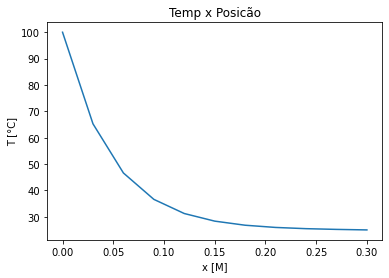

In [98]:
plt.plot(x, T[l])
plt.title("Temp x Posicão")
plt.xlabel("x [M]")
plt.ylabel("T [°C]")
plt.show()

In [102]:
m = sqrt((h*perimetro)/(condutividade*area))
teta_l = 25 - Ta
teta_b = Tb - Ta
teta_l/teta_b

0.0

In [103]:
T2 = []
for i in range(len(x)):
    eq = (teta_l*sinh(m*x[i])+ teta_b*sinh(m*(L-x[i])))/(sinh(m*L)) + Ta      
    T2.append(eq)

# 3

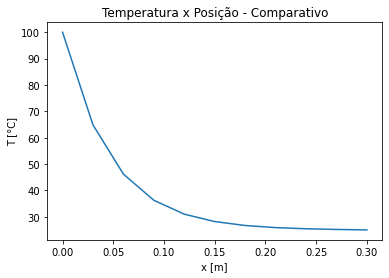

In [104]:
plt.plot(x, T2)
plt.title("Temperatura x Posição - Comparativo")
plt.xlabel("x [m]")
plt.ylabel("T [°C]")
plt.show()